In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

import sklearn

import seaborn as sns

In [4]:
air = pd.read_csv('D:\\2021 - Fall Semester\\1 - class\\577data\\AirQualityUCI.csv')

air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004/3/10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004/3/10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004/3/10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004/3/10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004/3/10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [5]:
air_CO = air.drop(columns=['PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)', 'Date', 'Time'])

air_CO

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
0,2.6,1360,150,11.9,166,113,13.6,48.9,0.7578
1,2.0,1292,112,9.4,103,92,13.3,47.7,0.7255
2,2.2,1402,88,9.0,131,114,11.9,54.0,0.7502
3,2.2,1376,80,9.2,172,122,11.0,60.0,0.7867
4,1.6,1272,51,6.5,131,116,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...
9352,3.1,1314,-200,13.5,472,190,21.9,29.3,0.7568
9353,2.4,1163,-200,11.4,353,179,24.3,23.7,0.7119
9354,2.4,1142,-200,12.4,293,175,26.9,18.3,0.6406
9355,2.1,1003,-200,9.5,235,156,28.3,13.5,0.5139


In [6]:
# Here we pick PT08.S1(CO), the sensor data of CO, as the target response, with the rest variables are predictors.

X = air_CO.drop(columns=['PT08.S1(CO)'])
y = air_CO['PT08.S1(CO)']

X

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
0,2.6,150,11.9,166,113,13.6,48.9,0.7578
1,2.0,112,9.4,103,92,13.3,47.7,0.7255
2,2.2,88,9.0,131,114,11.9,54.0,0.7502
3,2.2,80,9.2,172,122,11.0,60.0,0.7867
4,1.6,51,6.5,131,116,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...
9352,3.1,-200,13.5,472,190,21.9,29.3,0.7568
9353,2.4,-200,11.4,353,179,24.3,23.7,0.7119
9354,2.4,-200,12.4,293,175,26.9,18.3,0.6406
9355,2.1,-200,9.5,235,156,28.3,13.5,0.5139


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [8]:
DT_reg = DecisionTreeRegressor(max_depth=5)

DT_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [9]:
y_pred_0 = DT_reg.predict(X_test)
y_true = y_test
print(f"MSE reg1: {mean_squared_error(y_true, y_pred_0)} \n")

MSE reg1: 8182.954331805288 



In [10]:
def predicted_r2(x_test, y_true, y_pred):  # define a predicted r squared based on PRESS statistic

    X = x_test.values

    #calculate PRESS
    hat = X.dot(np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X)))
    denom = (1 - np.diag(hat))
    resid = np.abs(y_pred - y_true).to_numpy()
    PRESS = np.sum(np.sqrt(resid/denom))

    #calculate sum of Square total
    SST = np.sum((y_true - y_true.mean())**2)

    #calculate the predicted r squared
    pred_r2 = 1 - PRESS/SST
    return(pred_r2)

In [11]:
pr2 = predicted_r2(X_test, y_true, y_pred_0)  # And we see that the predicted r-squared is very close to 1, which means that the accuracy on test datasets is very good.
pr2

0.9999293130283567

In [12]:
# Is it possible to search a decision tree with the best max depth?

mse_on_depth = []
pred_r2 = []

for i in range(1, 20):
    reg_dt = DecisionTreeRegressor(max_depth=i)
    reg_dt.fit(X_train, y_train)

    y_pred_temp = reg_dt.predict(X_test)
    mse_on_depth.append(mean_squared_error(y_true, y_pred_temp))
    pred_r2.append(predicted_r2(X_test, y_true, y_pred_temp))
    

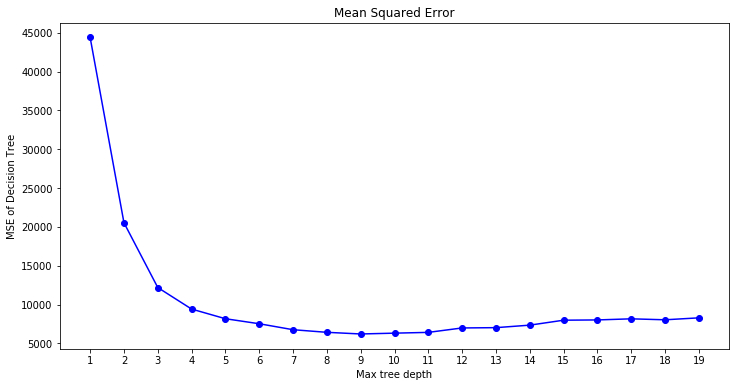

In [13]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20), mse_on_depth, marker='o',color = 'blue')
plt.xlabel('Max tree depth')
plt.ylabel('MSE of Decision Tree')
plt.xticks(np.arange(1, 20, 1))
plt.title('Mean Squared Error')
plt.show()

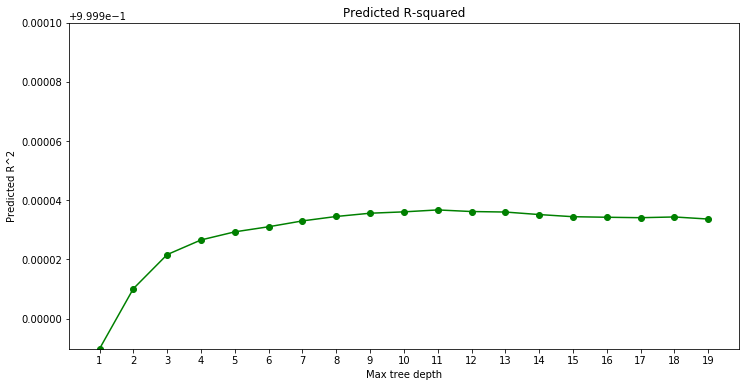

In [14]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20), pred_r2, marker='o',color = 'green')
plt.xlabel('Max tree depth')
plt.ylabel('Predicted R^2')
plt.xticks(np.arange(1, 20, 1))
plt.title('Predicted R-squared')
plt.ylim((min(pred_r2), 1))
plt.show()

#### So we find with a max_depth = 9, the model reaches the best MSE and a predicted r-squared at a very good level.

In [15]:
# Then we will do the same things with xgboost regression model.

mse_on_depth_xgb = []
pred_r2_xgb = []

for i in range(1, 20):
    reg_xgb = XGBRegressor(max_depth=i)
    reg_xgb.fit(X_train, y_train)

    y_pred_temp = reg_xgb.predict(X_test)
    mse_on_depth_xgb.append(mean_squared_error(y_true, y_pred_temp))
    pred_r2_xgb.append(predicted_r2(X_test, y_true, y_pred_temp))

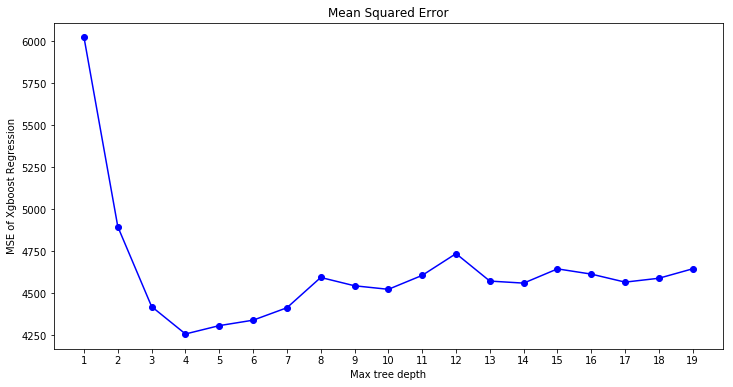

In [16]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20), mse_on_depth_xgb, marker='o',color = 'blue')
plt.xlabel('Max tree depth')
plt.ylabel('MSE of Xgboost Regression')
plt.xticks(np.arange(1, 20, 1))
plt.title('Mean Squared Error')
plt.show()

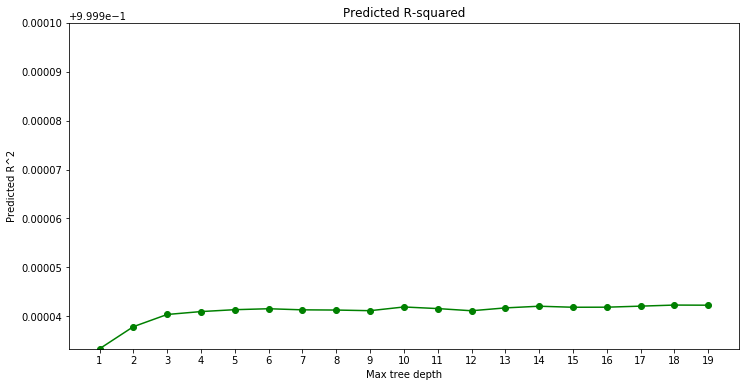

In [18]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20), pred_r2_xgb, marker='o',color = 'green')
plt.xlabel('Max tree depth')
plt.ylabel('Predicted R^2')
plt.xticks(np.arange(1, 20, 1))
plt.title('Predicted R-squared')
plt.ylim((min(pred_r2_xgb), 1))
plt.show()

#### At a max_depth = 4, the xgboost model reaches the best MSE and a predicted r-squared at a very good level.

#### It should be noticed that for xgboost, the model achieves a overall small MSE than decision tree, especially at the local minimum at max_depth = 4. For predicted R-squared, both of the models converge to the similar level of predicted r-squared.